In [53]:
from numpy import *
import operator
from os import listdir

In [54]:
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [55]:
group, labels = createDataSet()

In [56]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [57]:
labels

['A', 'A', 'B', 'B']

In [58]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [59]:
classify0([0,0], group, labels, 3)

'B'

In [60]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [79]:
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')

In [80]:
datingDataMat[0:20]

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       [7.5136000e+04, 1.3147394e+01, 4.2896400e-01],
       [3.8344000e+04, 1.6697880e+00, 1.3429600e-01],
       [7.2993000e+04, 1.0141740e+01, 1.0329550e+00],
       [3.5948000e+04, 6.8307920e+00, 1.2131920e+00],
       [4.2666000e+04, 1.3276369e+01, 5.4388000e-01],
       [6.7497000e+04, 8.6315770e+00, 7.4927800e-01],
       [3.5483000e+04, 1.2273169e+01, 1.5080530e+00],
       [5.0242000e+04, 3.7234980e+00, 8.3191700e-01],
       [6.3275000e+04, 8.3858790e+00, 1.6694850e+00],
       [5.5690000e+03, 4.8754350e+00, 7.2865800e-01],
       [5.1052000e+04, 4.6800980e+00, 6.2522400e-01],
       [7.7372000e+04, 1.5299570e+01, 3.3135100e-01],
       [4.3673000e+04, 1.8894610e+00, 1.9128300e-01],
       [6.1364000e+04, 7.5167540e+00, 1.2691640e+00],
       [6.9673000e+04, 1.4239195e+01, 2.6133300e-01],
       [1.5669000e+04, 0.000

In [81]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

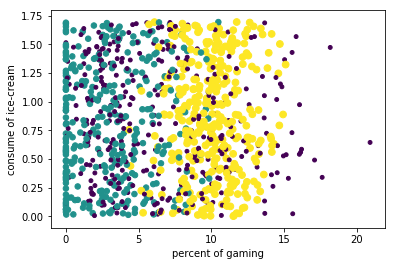

In [82]:
plt.scatter(datingDataMat[:,1], datingDataMat[:, 2], 15.0*array(datingLabels), 15.0*array(datingLabels))
plt.xlabel('percent of gaming')
plt.ylabel('consume of ice-cream')
plt.show()

In [83]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))   #element wise divide
    return normDataSet, ranges, minVals

In [84]:
def datingClassTest():
    hoRatio = 0.20      #hold out 10%
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print(errorCount)

In [85]:
datingDataMat.shape
datingLabels = array(datingLabels)

In [89]:
datingLabels = datingLabels.reshape(1000, 1)
datingLabels.shape

(1000, 1)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [106]:
datingDataMat = MinMaxScaler().fit_transform(datingDataMat)
X_train, X_test, y_train, y_test = train_test_split(datingDataMat, datingLabels, test_size=0.2, random_state=1)

In [112]:
X_train

array([[0.70923493, 0.47936329, 0.16621664],
       [0.19929223, 0.09890183, 0.25305764],
       [0.02503479, 0.18471756, 0.3630826 ],
       ...,
       [0.55775531, 0.72240867, 0.78081117],
       [0.6426435 , 0.06759063, 0.26571905],
       [0.06479463, 0.1059424 , 0.3458171 ]])

In [119]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [120]:
KNN.fit(X_train, y_train)

C:\Users\lilanqing\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [121]:
KNN.score(X_test, y_test)

0.945

In [122]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [128]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')           #load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
#         print("the classifier came back with: %d, the real answer is: %d") % (classifierResult, classNumStr)
        if (classifierResult != classNumStr): errorCount += 1.0
    print("\nthe total number of errors is: %s") % errorCount
    print("\nthe total error rate is: %s") % (errorCount/float(mTest))

In [129]:
handwritingClassTest()


the total number of errors is: %s


TypeError: unsupported operand type(s) for %: 'NoneType' and 'float'